In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
sns.set_style("whitegrid")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv('fraudTrain.csv')

In [4]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.shape

(1296675, 23)

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(1296675, 23)

In [9]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['date'] = df['trans_date_trans_time'].dt.date
df['time'] = df['trans_date_trans_time'].dt.time

In [11]:
df['transaction_count'] = df.groupby('cc_num')['trans_num'].transform('count')

In [12]:
from geopy.distance import geodesic
df['distance_to_merchant'] = df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).miles, axis=1)

In [13]:
df['is_weekend'] = (df['trans_date_trans_time'].dt.dayofweek >= 5).astype(int)

In [14]:
df['days_since_last_transaction'] = df.sort_values('trans_date_trans_time').groupby('cc_num')['trans_date_trans_time'].diff().dt.days

In [15]:
df['days_since_last_transaction'].min()

0.0

In [16]:
df['days_since_last_transaction'].max()

15.0

In [17]:
df['days_since_last_transaction'].unique()

array([nan,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  7., 11., 10.,  9.,
       12., 15., 13.])

In [18]:
bin_edges = [-1, 2, 6, 10, float('inf')]
bin_labels = ['Recent', 'Moderate', 'Long Ago', 'Very Long Ago']
df['gap_from_last_transaction'] = pd.cut(df['days_since_last_transaction'], bins=bin_edges, labels=bin_labels)

In [19]:
df['date'].dtype

dtype('O')

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df['dob'] = pd.to_datetime(df['dob'])

In [22]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

In [23]:
df.isna().sum()

Unnamed: 0                       0
trans_date_trans_time            0
cc_num                           0
merchant                         0
category                         0
amt                              0
first                            0
last                             0
gender                           0
street                           0
city                             0
state                            0
zip                              0
lat                              0
long                             0
city_pop                         0
job                              0
dob                              0
trans_num                        0
unix_time                        0
merch_lat                        0
merch_long                       0
is_fraud                         0
date                             0
time                             0
transaction_count                0
distance_to_merchant             0
is_weekend                       0
days_since_last_tran

In [24]:
df['dob'] = pd.to_datetime(df['dob'])
df['birth_month'] = df['dob'].dt.month_name()

In [25]:
current_year = pd.to_datetime('now').year
df['customer_age'] = current_year - pd.to_datetime(df['dob']).dt.year

In [26]:
df.select_dtypes(exclude='number').columns.tolist()

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num',
 'date',
 'time',
 'gap_from_last_transaction',
 'month',
 'birth_month']

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,1296675.0,648337.0,0.0,324168.5,648337.0,972505.5,1296674.0,374317.974488
trans_date_trans_time,1296675,2019-10-03 12:47:28.070214144,2019-01-01 00:00:18,2019-06-03 19:12:22.500000,2019-10-03 07:35:47,2020-01-28 15:02:55.500000,2020-06-21 12:13:37,NaN
cc_num,1296675.0,417192042079726656.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0,1308806447000240384.0
amt,1296675.0,70.351035,1.0,9.65,47.52,83.14,28948.9,160.316039
zip,1296675.0,48800.671097,1257.0,26237.0,48174.0,72042.0,99783.0,26893.222476
lat,1296675.0,38.537622,20.0271,34.6205,39.3543,41.9404,66.6933,5.075808
long,1296675.0,-90.226335,-165.6723,-96.798,-87.4769,-80.158,-67.9503,13.759077
city_pop,1296675.0,88824.440563,23.0,743.0,2456.0,20328.0,2906700.0,301956.360689
dob,1296675,1973-10-03 19:02:55.017178512,1924-10-30 00:00:00,1962-08-13 00:00:00,1975-11-30 00:00:00,1987-02-22 00:00:00,2005-01-29 00:00:00,NaN
unix_time,1296675.0,1349243636.726123,1325376018.0,1338750742.5,1349249747.0,1359385375.5,1371816817.0,12841278.423359


In [28]:
df.shape

(1296675, 34)

In [29]:
df = df.drop(columns=["days_since_last_transaction", "trans_num", "dob", "date", "time", "trans_date_trans_time", "cc_num", "Unnamed: 0", "first", "last"])


In [30]:
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,transaction_count,distance_to_merchant,is_weekend,gap_from_last_transaction,year,month,birth_month,customer_age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,2028,48.947783,0,NaN,2019,January,March,35
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,3030,18.775736,0,NaN,2019,January,June,45
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,503,67.172035,0,NaN,2019,January,January,61
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,493,59.455974,0,NaN,2019,January,January,56
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,2017,48.282030,0,NaN,2019,January,March,37


In [31]:
df.shape

(1296675, 24)

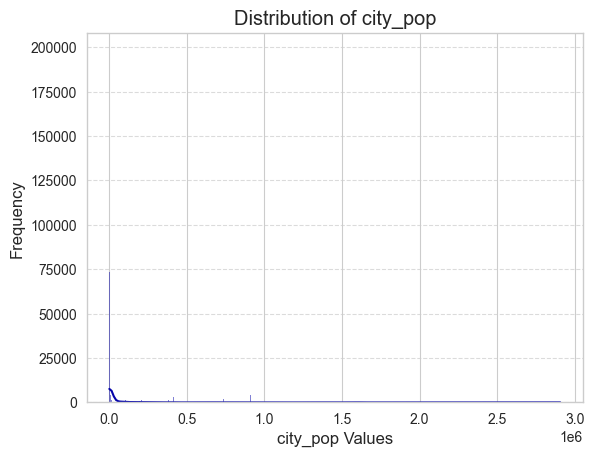

In [32]:
sns.histplot(df['city_pop'], kde=True, color='#0504aa', bins='auto')
plt.title('Distribution of city_pop')
plt.xlabel('city_pop Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

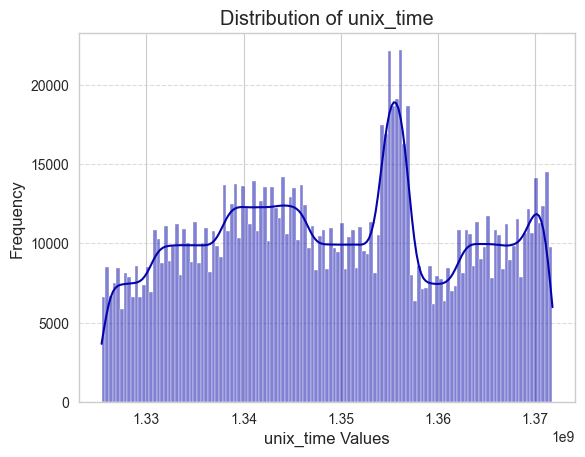

In [33]:
sns.histplot(df['unix_time'], kde=True, color='#0504aa', bins='auto')
plt.title('Distribution of unix_time')
plt.xlabel('unix_time Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

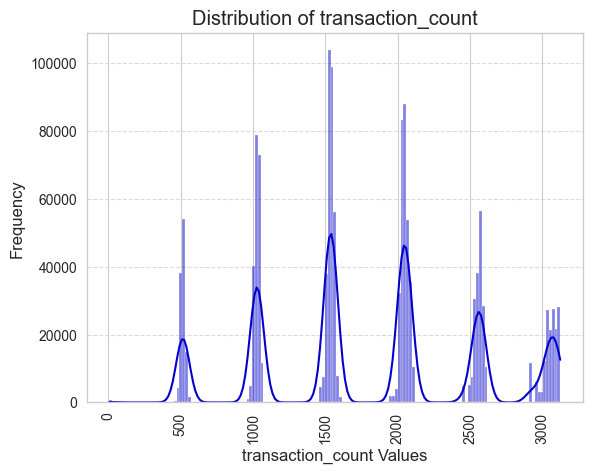

In [68]:
sns.histplot(df['transaction_count'], kde=True, color='#0302ca', bins='auto')
plt.title('Distribution of transaction_count')
plt.xlabel('transaction_count Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

C:\Users\Rina\AppData\Local\Temp\ipykernel_16452\1112895637.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


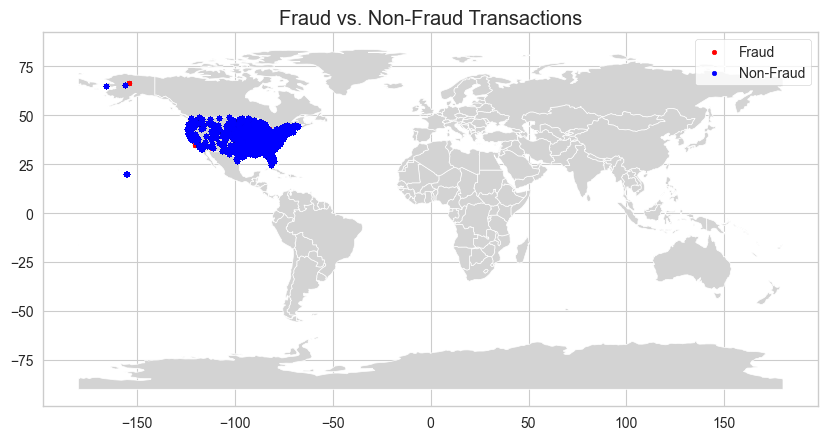

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray')
gdf[gdf['is_fraud'] == 1].plot(ax=ax, markersize=10, color='red', label='Fraud')
gdf[gdf['is_fraud'] == 0].plot(ax=ax, markersize=10, color='blue', label='Non-Fraud')

plt.title('Fraud vs. Non-Fraud Transactions')
plt.legend()
plt.show()

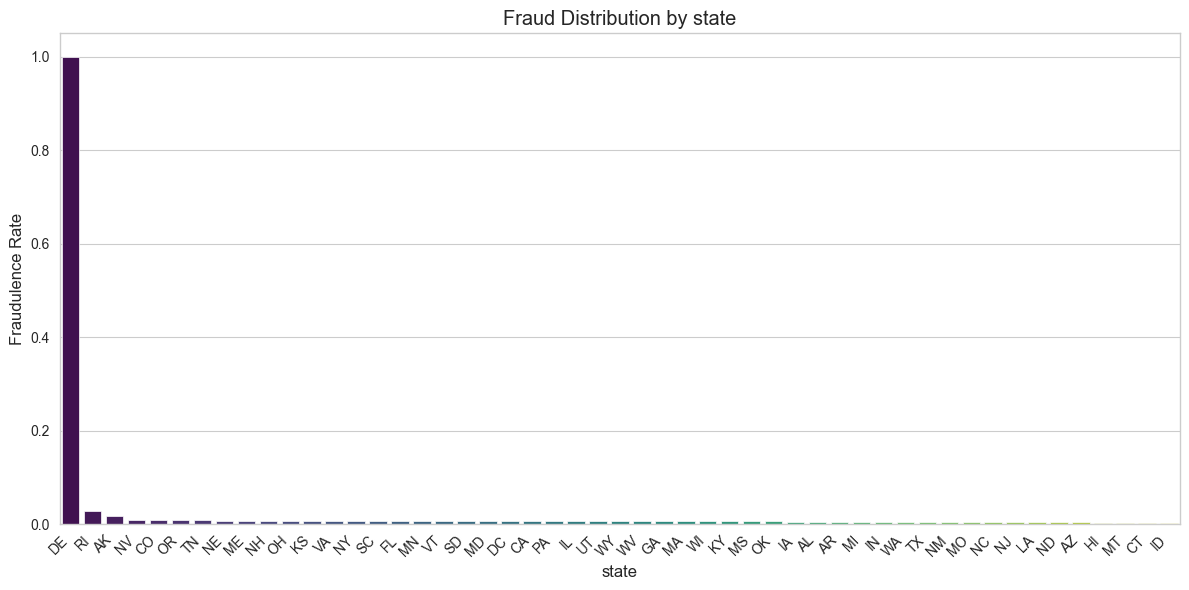

In [42]:
fraud_counts = df.groupby('state')['is_fraud'].sum().reset_index()
total_counts = df['state'].value_counts().reset_index()
total_counts.columns = ['state', 'total_count']
fraud_by_gender = pd.merge(fraud_counts, total_counts, on='state')
fraud_by_gender['fraudulence_rate'] = fraud_by_gender['is_fraud'] / fraud_by_gender['total_count']
fraud_by_gender = fraud_by_gender.sort_values(by='fraudulence_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='fraudulence_rate', data=fraud_by_gender, palette='viridis')
plt.title('Fraud Distribution by state')
plt.xlabel('state')
plt.ylabel('Fraudulence Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


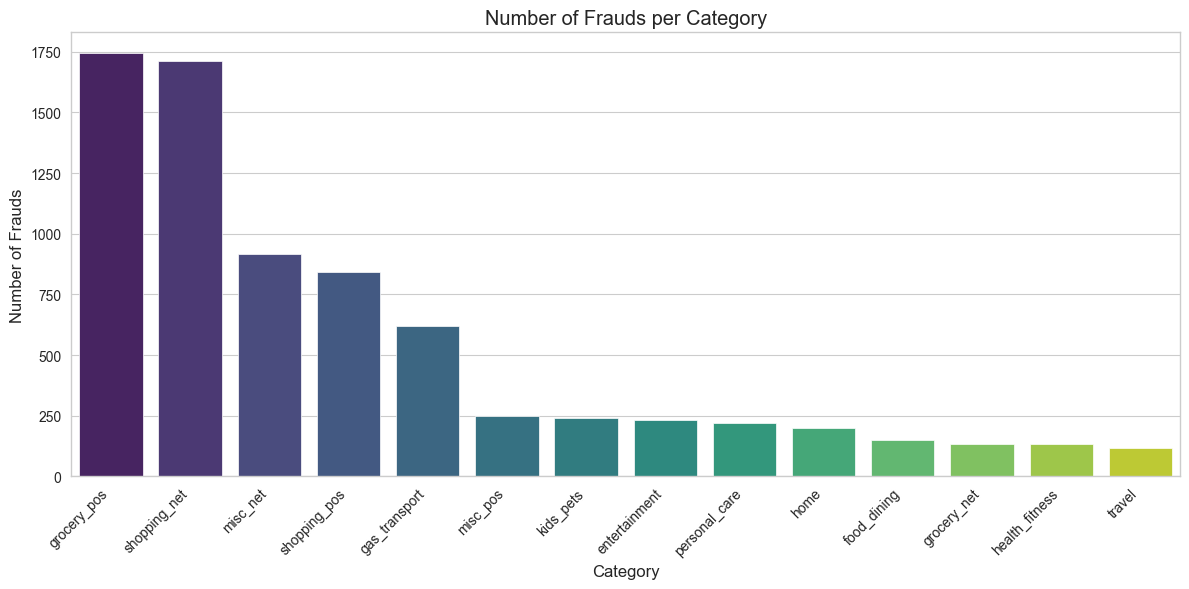

In [44]:
frauds_per_category = df[df['is_fraud'] == 1].groupby('category').size().reset_index(name='fraud_count')

frauds_per_category = frauds_per_category.sort_values(by='fraud_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='fraud_count', data=frauds_per_category, palette='viridis')
plt.title('Number of Frauds per Category')
plt.xlabel('Category')
plt.ylabel('Number of Frauds')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

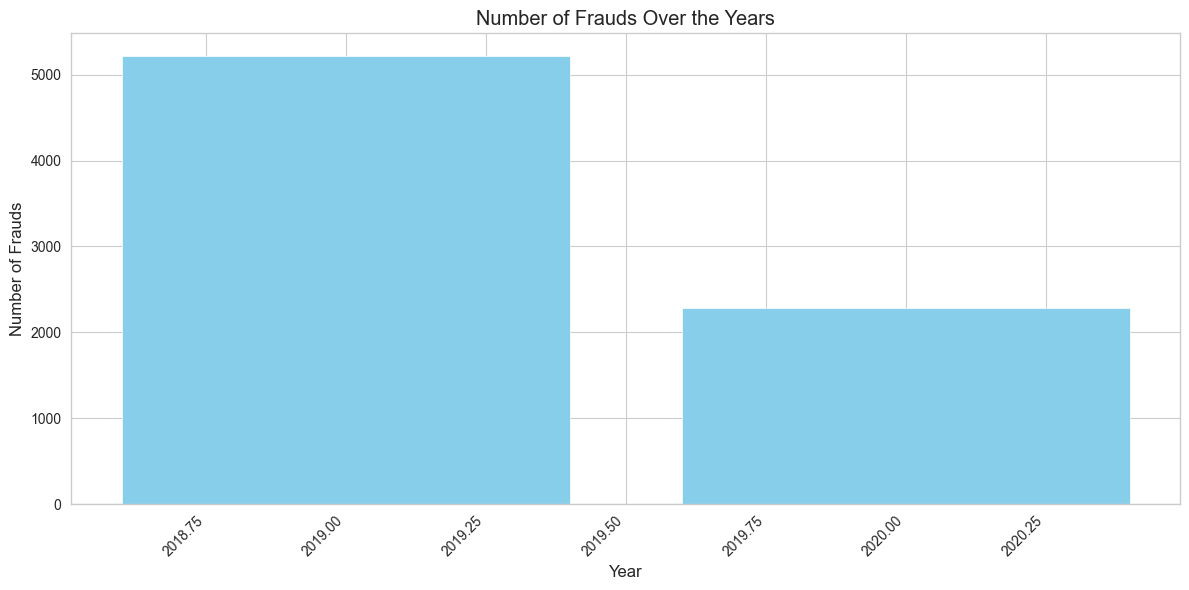

In [60]:
frauds_per_year = df[df['is_fraud'] == 1].groupby('year').size().reset_index(name='fraud_count')

# Sort the DataFrame by year for better visualization
frauds_per_year = frauds_per_year.sort_values(by='year')

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(frauds_per_year['year'], frauds_per_year['fraud_count'], color='skyblue')
plt.title('Number of Frauds Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Frauds')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()


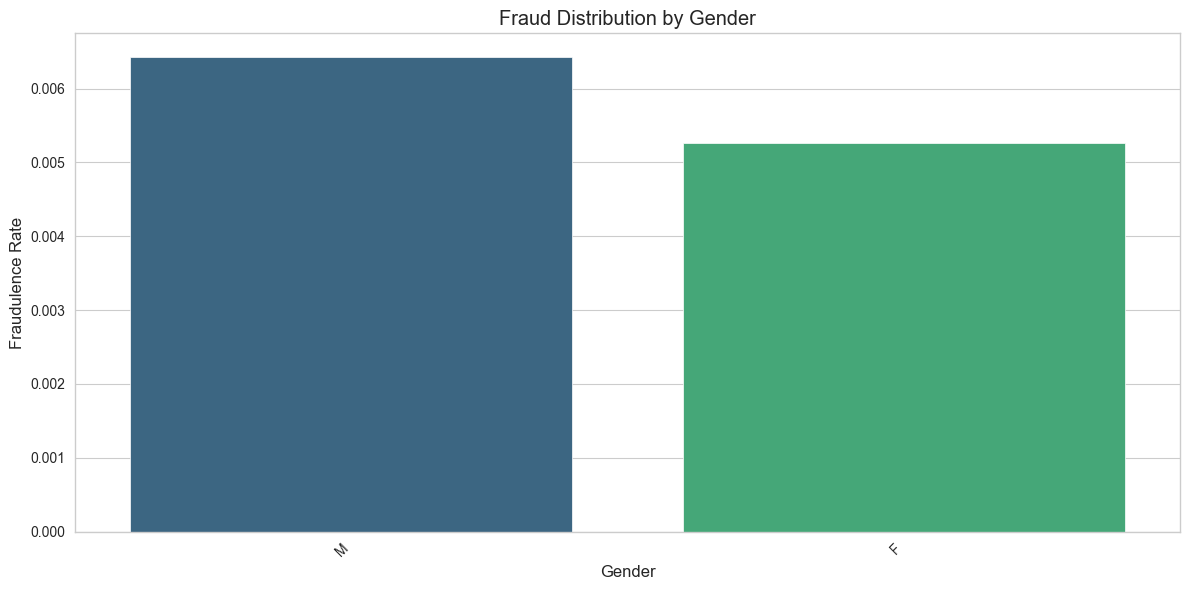

In [41]:
fraud_counts = df.groupby('gender')['is_fraud'].sum().reset_index()
total_counts = df['gender'].value_counts().reset_index()
total_counts.columns = ['gender', 'total_count']
fraud_by_gender = pd.merge(fraud_counts, total_counts, on='gender')
fraud_by_gender['fraudulence_rate'] = fraud_by_gender['is_fraud'] / fraud_by_gender['total_count']
fraud_by_gender = fraud_by_gender.sort_values(by='fraudulence_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='fraudulence_rate', data=fraud_by_gender, palette='viridis')
plt.title('Fraud Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraudulence Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


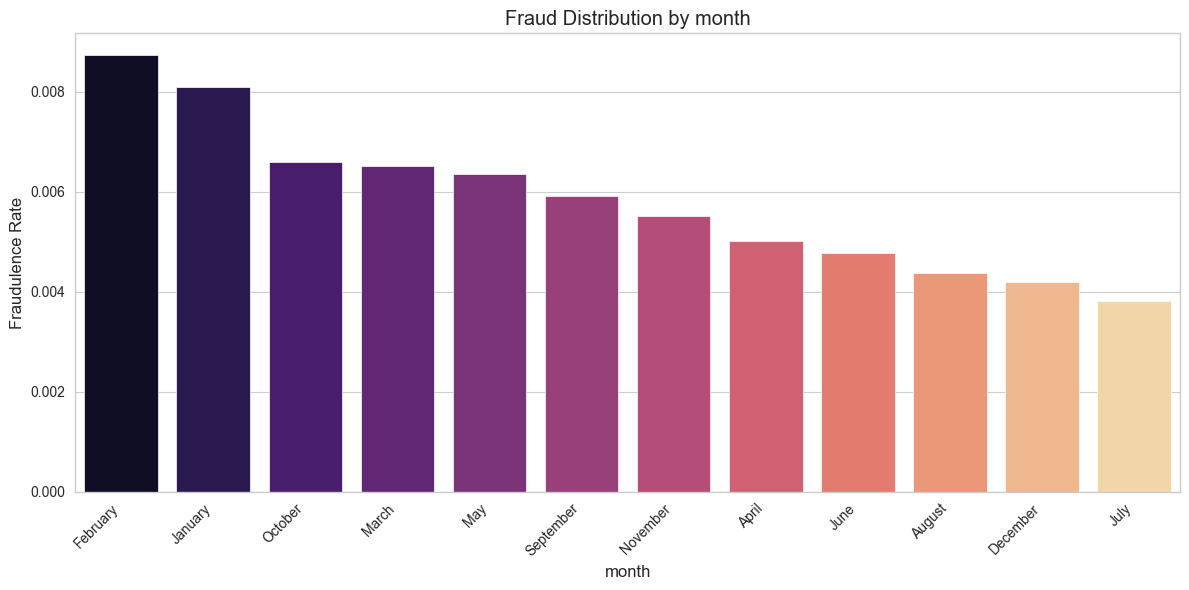

In [55]:
fraud_counts = df.groupby('month')['is_fraud'].sum().reset_index()
total_counts = df['month'].value_counts().reset_index()
total_counts.columns = ['month', 'total_count']
fraud_by_gender = pd.merge(fraud_counts, total_counts, on='month')
fraud_by_gender['fraudulence_rate'] = fraud_by_gender['is_fraud'] / fraud_by_gender['total_count']
fraud_by_gender = fraud_by_gender.sort_values(by='fraudulence_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='fraudulence_rate', data=fraud_by_gender, palette='magma')
plt.title('Fraud Distribution by month')
plt.xlabel('month')
plt.ylabel('Fraudulence Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


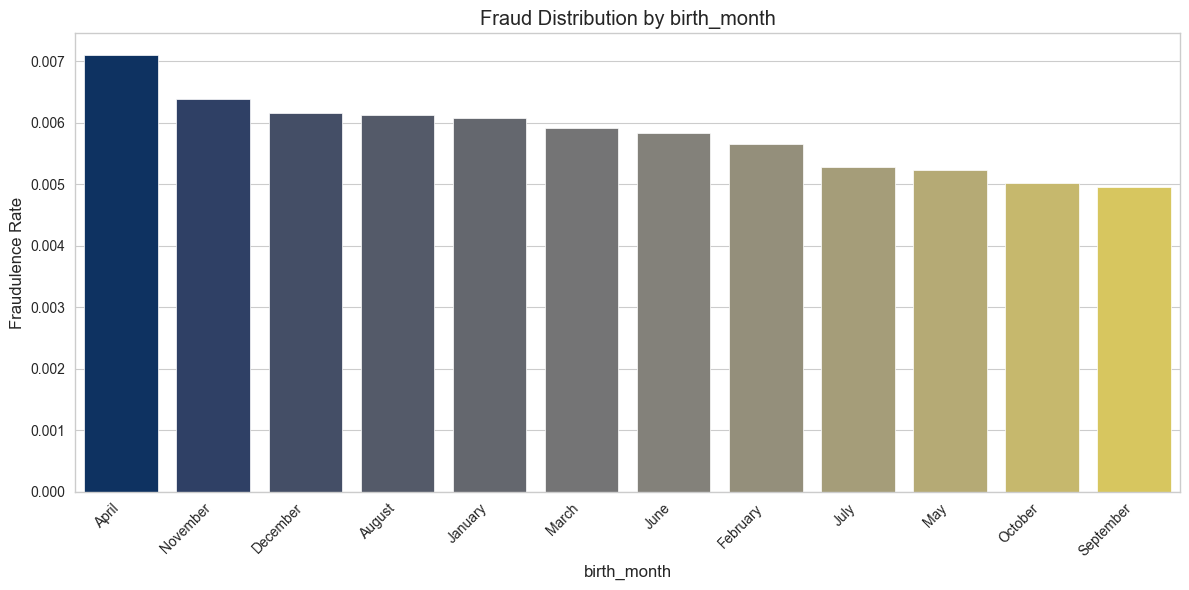

In [51]:
fraud_counts = df.groupby('birth_month')['is_fraud'].sum().reset_index()
total_counts = df['birth_month'].value_counts().reset_index()
total_counts.columns = ['birth_month', 'total_count']
fraud_by_gender = pd.merge(fraud_counts, total_counts, on='birth_month')
fraud_by_gender['fraudulence_rate'] = fraud_by_gender['is_fraud'] / fraud_by_gender['total_count']
fraud_by_gender = fraud_by_gender.sort_values(by='fraudulence_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='birth_month', y='fraudulence_rate', data=fraud_by_gender, palette='cividis')
plt.title('Fraud Distribution by birth_month')
plt.xlabel('birth_month')
plt.ylabel('Fraudulence Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


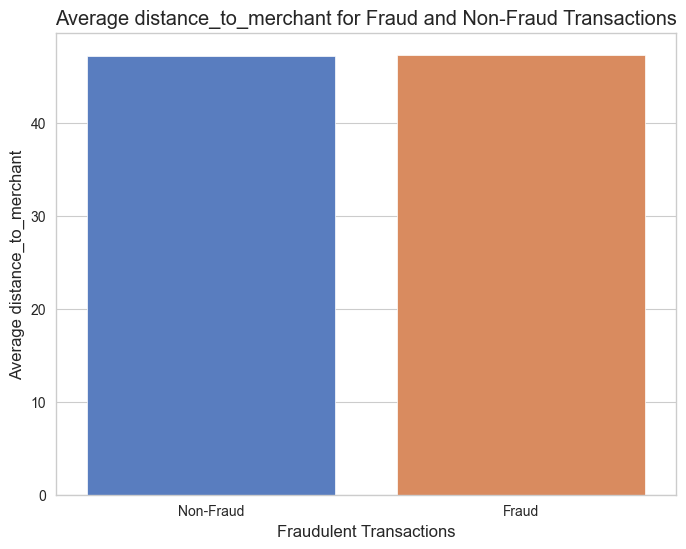

In [56]:
avg_amt_by_fraud = df.groupby('is_fraud')['distance_to_merchant'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='is_fraud', y='distance_to_merchant', data=avg_amt_by_fraud, palette='muted')
plt.title('Average distance_to_merchant for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Average distance_to_merchant')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

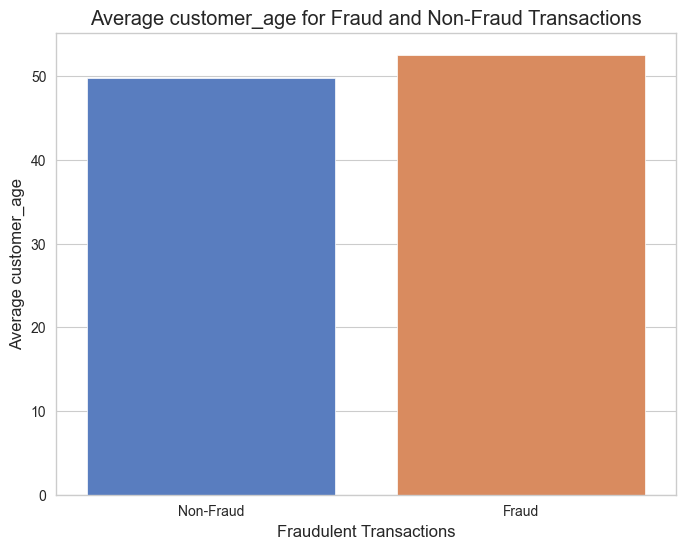

In [57]:
avg_amt_by_fraud = df.groupby('is_fraud')['customer_age'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='is_fraud', y='customer_age', data=avg_amt_by_fraud, palette='muted')
plt.title('Average customer_age for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Average customer_age')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

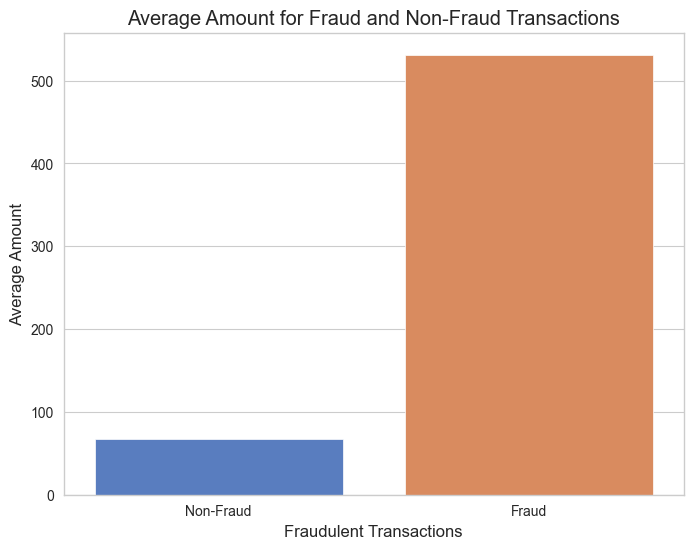

In [58]:
avg_amt_by_fraud = df.groupby('is_fraud')['amt'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='is_fraud', y='amt', data=avg_amt_by_fraud, palette='muted')
plt.title('Average Amount for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Average Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

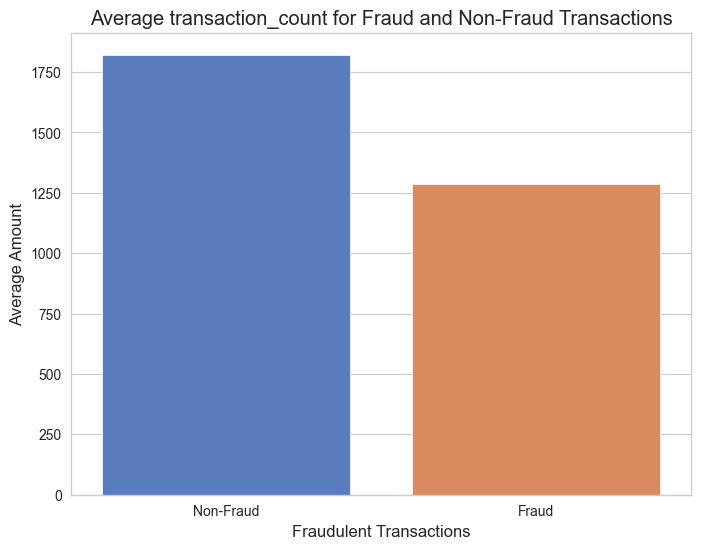

In [59]:
avg_amt_by_fraud = df.groupby('is_fraud')['transaction_count'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='is_fraud', y='transaction_count', data=avg_amt_by_fraud, palette='muted')
plt.title('Average transaction_count for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Average Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

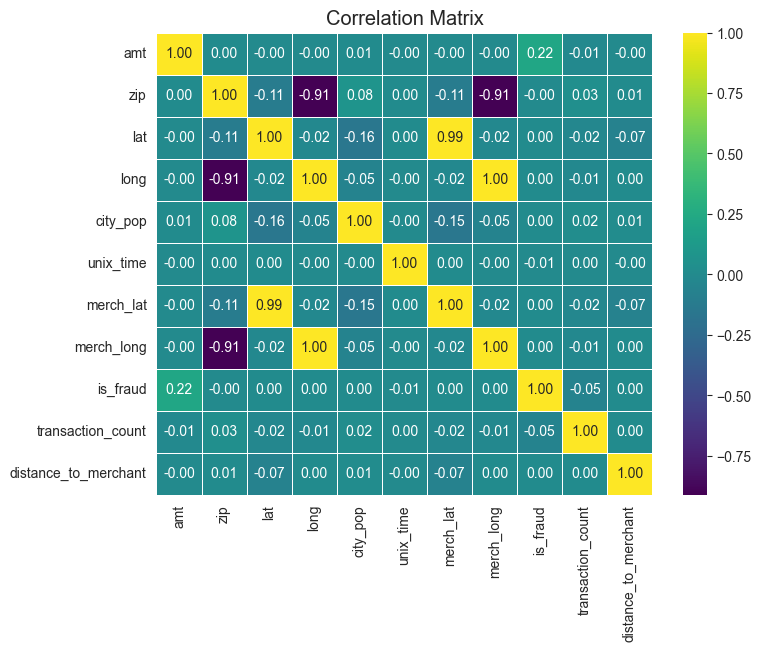

In [70]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
categories = df['gender'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='gender')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('gender', axis=1, inplace=True)

In [33]:
categories = df['state'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='state')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('state', axis=1, inplace=True)

In [34]:
categories = df['job'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='job')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('job', axis=1, inplace=True)

In [35]:
categories = df['category'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='category')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('category', axis=1, inplace=True)

In [36]:
df['month'] = pd.to_datetime(df['month'], format='%B').dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df = df.drop(columns=['month'])

In [37]:
df['birth_month'] = pd.to_datetime(df['birth_month'], format='%B').dt.month
df['birth_month_sin'] = np.sin(2 * np.pi * df['birth_month'] / 12)
df['birth_month_cos'] = np.cos(2 * np.pi * df['birth_month'] / 12)
df = df.drop(columns=['birth_month'])

In [38]:
df.shape

(1296675, 615)

In [39]:
df = df.drop(columns=['merchant', 'city', 'street'])

In [40]:
from sklearn.preprocessing import OrdinalEncoder

column_to_encode = df[['gap_from_last_transaction']]
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_encoded = pd.DataFrame(ordinal_encoder.fit_transform(column_to_encode), columns=['gap_from_last_transaction'])
df['gap_from_last_transaction'] = column_encoded['gap_from_last_transaction']


In [41]:
df['gap_from_last_transaction'] = df['gap_from_last_transaction'].fillna(-1)

In [42]:
df

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transaction_count,distance_to_merchant,is_weekend,gap_from_last_transaction,year,customer_age,gender_F,gender_M,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,job_Academic librarian,job_Accountant,job_Accounting technician,job_Acupuncturist,job_Administrator,job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,job_Biochemist,job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,job_Buyer,job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,job_Chemist,job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,job_Civil engineer,job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,job_Conservation officer,job_Conservator,job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,job_Copywriter,job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,job_Designer,job_Development worker,job_Diagnostic radiographer,job_Dispensing optician,job_Doctor,job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,job_Editor,job_Education administrator,job_Education officer,job_Educational psychologist,job_Electrical engineer,job_Electronics engineer,job_Embryologist,job_Emergency planning/management officer,job_Energy engineer,job_Energy manager,job_Engineer,job_Engineering geologist,job_English as a foreign language teacher,job_English as a second language teacher,job_Environmental consultant,job_Environmental education officer,job_Environmental health practitioner,job_Enviro

In [43]:
y = df['is_fraud']
X = df.drop('is_fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_selected = pca.fit_transform(X_train)
X_test_selected = pca.transform(X_test)

In [46]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train_selected, y_train)

In [49]:
X_train.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,transaction_count,distance_to_merchant,is_weekend,gap_from_last_transaction,year,customer_age,gender_F,gender_M,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,job_Academic librarian,job_Accountant,job_Accounting technician,job_Acupuncturist,job_Administrator,job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,job_Biochemist,job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,job_Buyer,job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,job_Chemist,job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,job_Civil engineer,job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,job_Conservation officer,job_Conservator,job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,job_Copywriter,job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,job_Designer,job_Development worker,job_Diagnostic radiographer,job_Dispensing optician,job_Doctor,job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,job_Editor,job_Education administrator,job_Education officer,job_Educational psychologist,job_Electrical engineer,job_Electronics engineer,job_Embryologist,job_Emergency planning/management officer,job_Energy engineer,job_Energy manager,job_Engineer,job_Engineering geologist,job_English as a foreign language teacher,job_English as a second language teacher,job_Environmental consultant,job_Environmental education officer,job_Environmental health practitioner,job_Environmental m

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create Decision Tree model with verbose=1 and other parameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Print the accuracy on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy on the test set: {accuracy_dt}")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

# Classification Report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(classification_rep_dt)


Accuracy on the test set: 0.9964987371546455
Confusion Matrix:
[[257294    521]
 [   387   1133]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.69      0.75      0.71      1520

    accuracy                           1.00    259335
   macro avg       0.84      0.87      0.86    259335
weighted avg       1.00      1.00      1.00    259335



In [56]:
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train_subset_pred = dt_classifier.predict(X_train_subset)

# Print the accuracy on the subset of the training set
accuracy_train_subset = accuracy_score(y_train_subset, y_train_subset_pred)
print(f"Accuracy on the training set subset: {accuracy_train_subset}")

Accuracy on the training set subset: 1.0


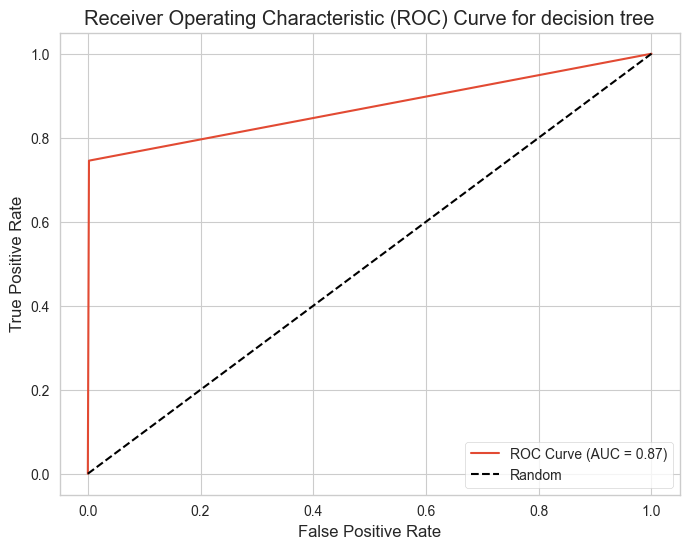

In [57]:
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for decision tree')
plt.legend(loc='lower right')
plt.show()

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new_std, y_train_new)
y_pred_knn = knn.predict(X_test_selected)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("accuracy knn is:", accuracy_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Classification Report
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(classification_rep_knn)

accuracy knn is: 0.9270403146509342
Confusion Matrix:
[[239464  18351]
 [   570    950]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    257815
           1       0.05      0.62      0.09      1520

    accuracy                           0.93    259335
   macro avg       0.52      0.78      0.53    259335
weighted avg       0.99      0.93      0.96    259335



In [89]:
y_pred_knn = knn.predict(X_train_new_std)
accuracy_knn = accuracy_score(y_train_new, y_pred_knn)
print("accuracy knn is:", accuracy_knn)

accuracy knn is: 0.9757745290771099


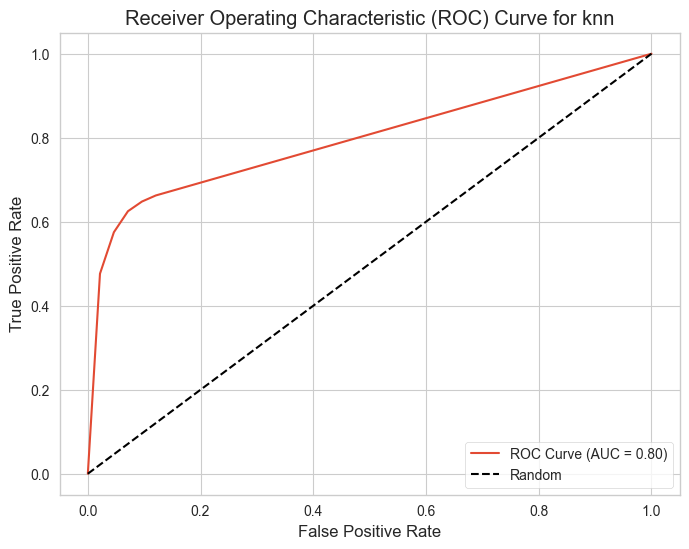

In [90]:
y_pred_prob = knn.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for knn')
plt.legend(loc='lower right')
plt.show()

In [47]:
y_pred_prob = dt_classifier.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for decision tree')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_over, y_train_over)
y_pred_rf = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9935990128598146
[[257220    595]
 [  1065    455]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.43      0.30      0.35      1520

    accuracy                           0.99    259335
   macro avg       0.71      0.65      0.68    259335
weighted avg       0.99      0.99      0.99    259335



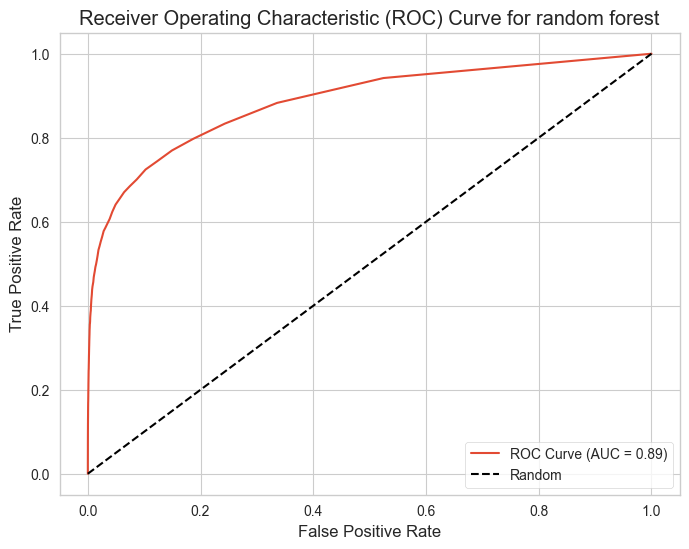

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = rf.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for random forest')
plt.legend(loc='lower right')
plt.show()

In [48]:
X_train_new_std, _, y_train_new, _ = train_test_split(X_train_over, y_train_over, test_size=0.8, random_state=42)

In [49]:
X_train_new_std.shape

(412541, 50)

In [57]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# X_train_new_std, _, y_train_new, _ = train_test_split(X_train_over, y_train_over, test_size=0.2, random_state=42)

# Create an SVM model
svm = SVC(kernel='rbf', max_iter=500, probability=True)

# Fit the model on the new training set
svm.fit(X_train_new_std, y_train_new)

# Make predictions on the validation set
y_pred_svm = svm_model.predict(X_test_selected)

# Evaluate the model on the validation set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("accuracy svm:", accuracy_svm)

c:\Users\Rina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy svm: 0.9233115468409586


In [58]:
y_pred_svm = svm.predict(X_test_selected)

# Evaluate the model on the validation set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("accuracy svm:", accuracy_svm)

accuracy svm: 0.9233115468409586


In [63]:
y_pred_svm_train = svm.predict(X_train_new_std)
accuracy_svm_train = accuracy_score(y_train_new, y_pred_svm_train)
print("accuracy svm on train:", accuracy_svm_train)

accuracy svm on train: 0.5728060968485557


In [59]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[239257  18558]
 [  1330    190]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    257815
           1       0.01      0.12      0.02      1520

    accuracy                           0.92    259335
   macro avg       0.50      0.53      0.49    259335
weighted avg       0.99      0.92      0.95    259335



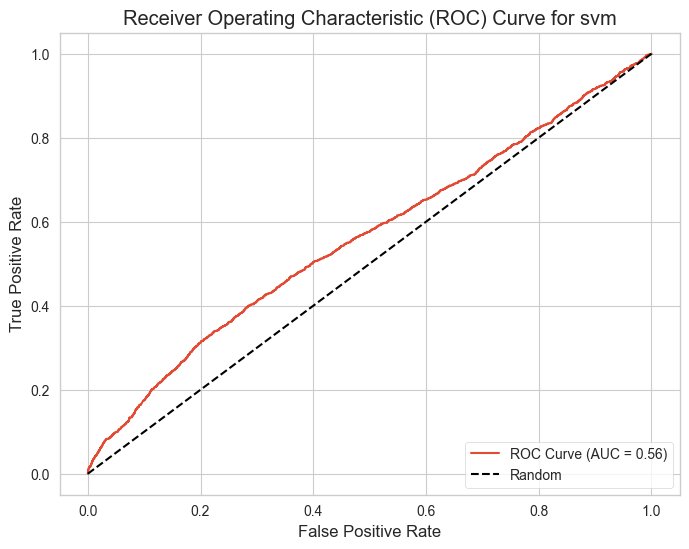

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = svm.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for svm')
plt.legend(loc='lower right')
plt.show()

In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(verbose=1, max_iter=200)

# Train the model
logreg.fit(X_train_over, y_train_over)

# Predictions on the test set
y_pred_logred = logreg.predict(X_test_selected)

# Print the accuracy on the test set
accuracy_logred = np.mean(y_pred_logred == y_test)
conf_matrix_logred = confusion_matrix(y_test, y_pred_logred)
classification_rep_logred = classification_report(y_test, y_pred_logred)

In [65]:
print(accuracy_logred)
print(conf_matrix_logred)
print(classification_rep_logred)

0.7311315479977635
[[188522  69293]
 [   434   1086]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84    257815
           1       0.02      0.71      0.03      1520

    accuracy                           0.73    259335
   macro avg       0.51      0.72      0.44    259335
weighted avg       0.99      0.73      0.84    259335



In [70]:
y_pred_logreg_train = logreg.predict(X_train_new_std)

accuracy_y_pred_logred = accuracy_score(y_train_new, y_pred_logreg_train)
print(f"Accuracy on the train set: {accuracy_y_pred_logred}")

# Confusion Matrix
conf_matrix_y_pred_logred = confusion_matrix(y_train_new, y_pred_logreg_train)
print("Confusion Matrix:")
print(conf_matrix_y_pred_logred)

# Classification Report
classification_rep_y_pred_logred = classification_report(y_train_new, y_pred_logreg_train)
print("Classification Report:")
print(classification_rep_y_pred_logred)

Accuracy on the train set: 0.7390974472840275
Confusion Matrix:
[[150806  55499]
 [ 52134 154102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74    206305
           1       0.74      0.75      0.74    206236

    accuracy                           0.74    412541
   macro avg       0.74      0.74      0.74    412541
weighted avg       0.74      0.74      0.74    412541



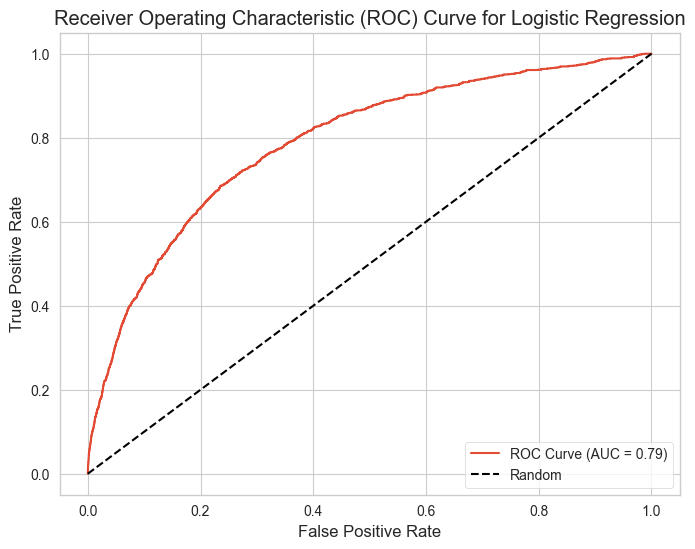

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = logreg.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [71]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_new_std, y_train_new)
y_pred_bais = nb.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_bais)
print("Naive Bayes Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred_bais))
print(classification_report(y_test, y_pred_bais))

Naive Bayes Accuracy: 0.6352362774018162
[[163705  94110]
 [   486   1034]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.78    257815
           1       0.01      0.68      0.02      1520

    accuracy                           0.64    259335
   macro avg       0.50      0.66      0.40    259335
weighted avg       0.99      0.64      0.77    259335



In [75]:
y_pred_bais_train = nb.predict(X_train_new_std)
accuracy = accuracy_score(y_train_new, y_pred_bais_train)
print("Naive Bayes Accuracy:", accuracy)
print(confusion_matrix(y_train_new, y_pred_bais_train))
print(classification_report(y_train_new, y_pred_bais_train))

Naive Bayes Accuracy: 0.6882225039450625
[[130872  75433]
 [ 53188 153048]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67    206305
           1       0.67      0.74      0.70    206236

    accuracy                           0.69    412541
   macro avg       0.69      0.69      0.69    412541
weighted avg       0.69      0.69      0.69    412541



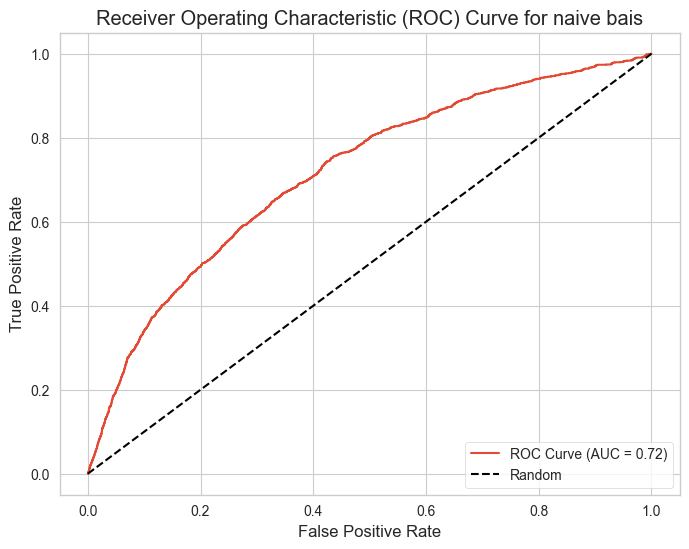

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = nb.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for naive bais')
plt.legend(loc='lower right')
plt.show()

c:\Users\Rina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


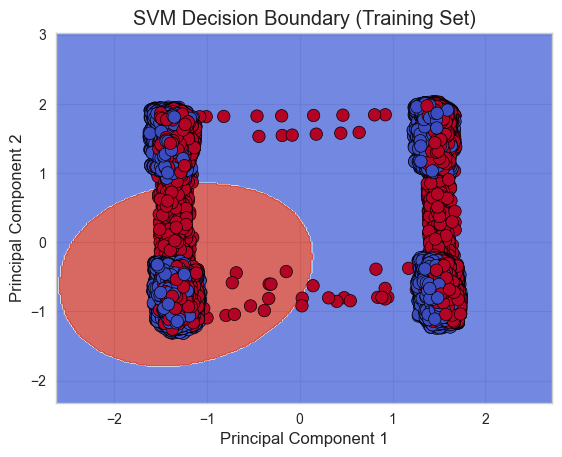

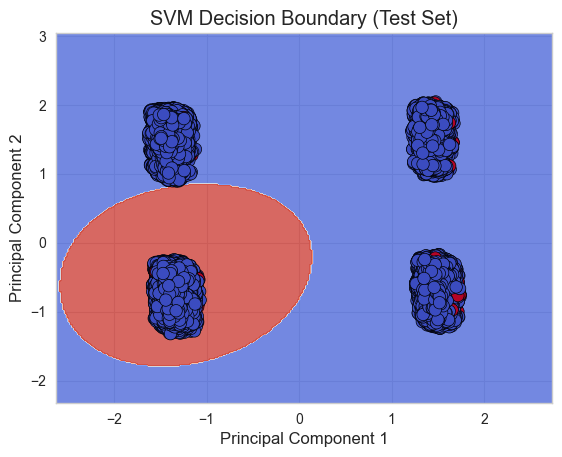

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_new_std)
X_test_pca = pca.transform(X_test_selected)

svm_model = SVC(kernel='rbf', max_iter=500)
svm_model.fit(X_train_pca, y_train_new)

# Plot the decision boundary in the reduced 2D space
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=80)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot decision boundary for the training set
plot_decision_boundary(X_train_pca, y_train_new, svm_model, 'SVM Decision Boundary (Training Set)')

# Plot decision boundary for the test set
plot_decision_boundary(X_test_pca, y_test, svm_model, 'SVM Decision Boundary (Test Set)')


In [83]:
re = svm_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, re)
print("accuracy svm:", accuracy_svm)

accuracy svm: 0.6086336206065514


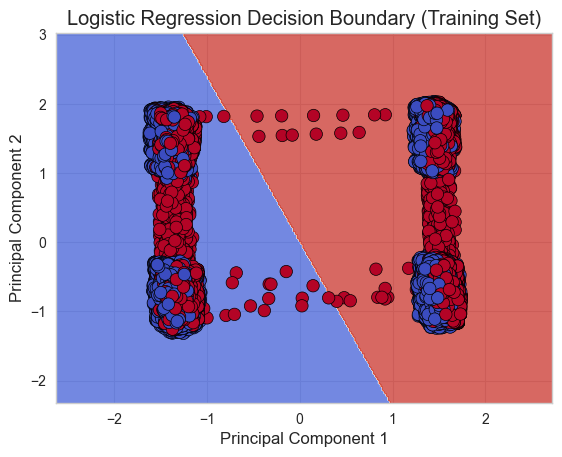

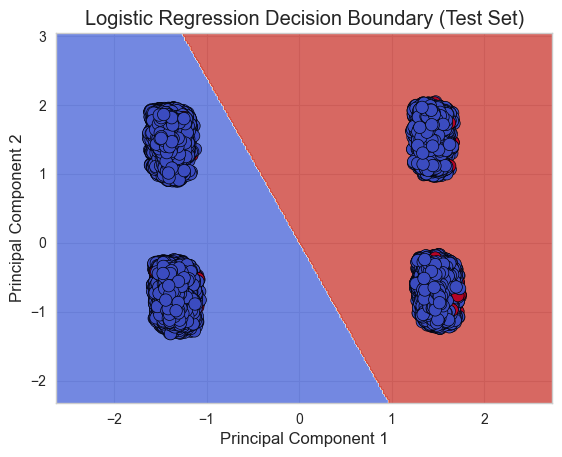

In [85]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_pca, y_train_new)

# Plot the decision boundary in the reduced 2D space
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=80)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot decision boundary for the training set
plot_decision_boundary(X_train_pca, y_train_new, logreg_model, 'Logistic Regression Decision Boundary (Training Set)')

# Plot decision boundary for the test set
plot_decision_boundary(X_test_pca, y_test, logreg_model, 'Logistic Regression Decision Boundary (Test Set)')


In [86]:
we = logreg_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, we)
print("accuracy logreg:", accuracy_svm)

accuracy logreg: 0.5460658993194131


In [ ]:
# example code for pipeline


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


y = df['is_fraud']
X = df.drop('is_fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ordinal_encode_columns = ['gap_from_last_transaction']
categorical_columns = ['gender', 'state', 'job', 'category']

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_encode_columns),
        ('onehot', OneHotEncoder(), categorical_columns),
        ('scaling', MinMaxScaler(feature_range=(-1, 1)), X.columns),  # Scale all columns
    ],
    remainder='passthrough'
)

decision_tree_model = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=50)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', decision_tree_model)
])


X_train_preprocessed = pipeline.fit_transform(X_train, y_train)
X_test_preprocessed = pipeline.transform(X_test)
